In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

# Бинарная классификация

Модель: $
a(x, w) = sign(<x, w>) =
\begin{cases}
  -1, x \in C_1\\
  +1, x \in C_2
 \end{cases}
$

Вектор весов: $w = [w_0, w_1, ..., w_n]^T$

Функция потерь: $Q(a, X^l) = \sum_{i=1}^l [M_i<0] \rightarrow min$

Отступ: $M_i = <w, x_i> y_i$

Функция потерь i-го разряда: $L_i(w) = [M_i<0]$

0 5
1 4
2 2
3 2
4 0
[1.6000000000000003, -1]


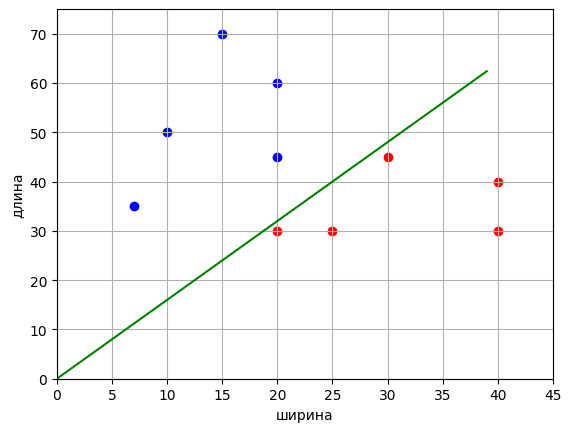

In [58]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)                          # размер обучающей выборки
w = [0, -1]                                     # начальное значение вектора w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # решающее правило
N = 10                                          # максимальное число итераций
L = 0.1                                         # шаг изменения веса
e = 0.1                                         # небольшая добавка для w0 чтобы был зазор между разделяющей линией и граничным образом

last_error_index = -1                           # индекс последнего ошибочного наблюдения

for n in range(N):
    for i in range(n_train):                # перебор по наблюдениям
        if y_train[i]*a(x_train[i]) < 0:    # если ошибка классификации,
            w[0] = w[0] + L * y_train[i]    # то корректировка веса w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    print(n, Q)
    if Q == 0:      # показатель качества классификации (число ошибок)
        break       # останов, если все верно классифицируем

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

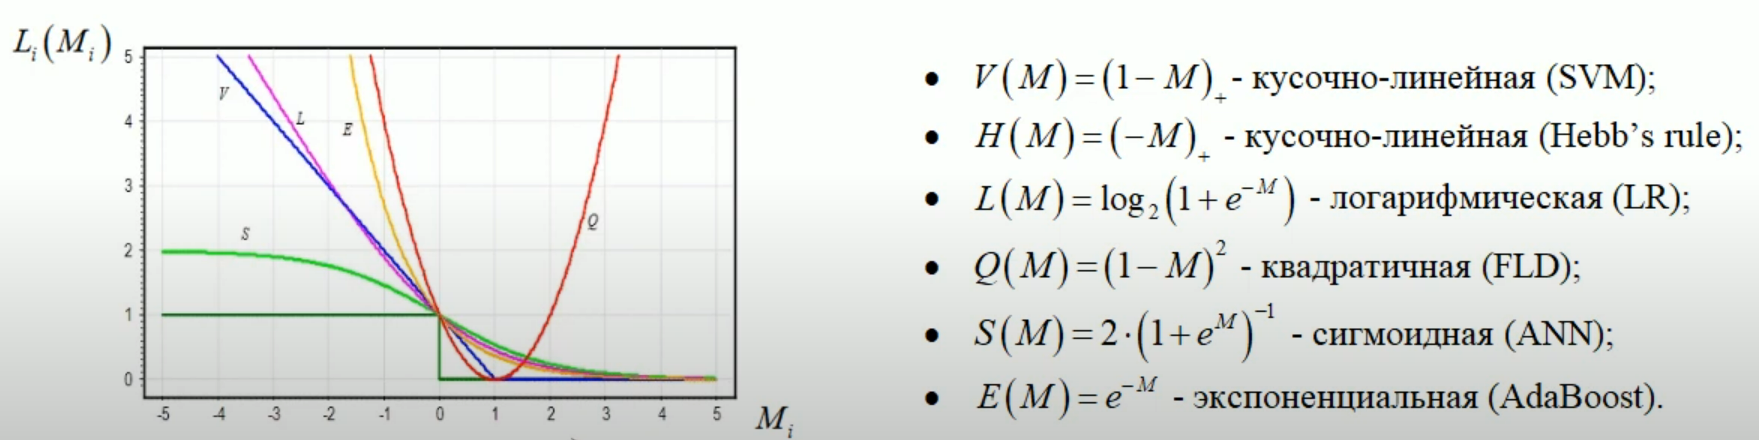

# Минимизирующие функции потерь

**Квадратичная (FLD)**

$L_i(w) = (1-M)^2=(1-w^Tx_iy_i)^2$

$Q(w) = \sum_{i=1}^l (1-w^Tx_iy_i)^2 → min$

$\frac{dQ(w)}{dw} = -2 \sum_{i=1}^l (1 - w^Tx_iy-i)x_i^Ty_i = 0$

$w^T = \sum_{i=1}^lx_i^Ty_i(\sum_{i=1}^lx_ix_i^T)^{-1}$

Аналитическое решение (квадратичная функция потерь)

In [13]:
def anal_fld(x_train, y_train):
  pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)
  xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)
  w = np.dot(pt, np.linalg.inv(xxt))
  print(w)
  return w

[ 0.1912188   0.05793234 -0.0346272 ]


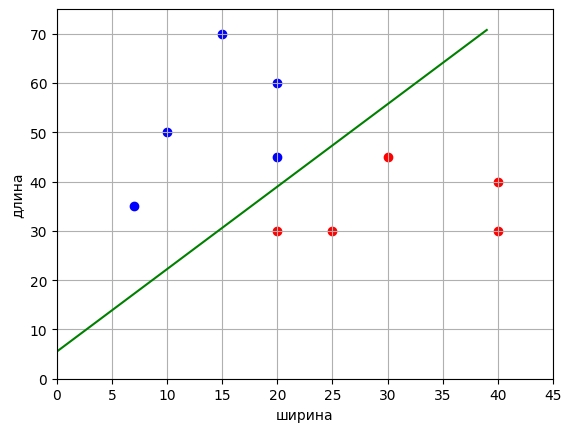

In [25]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [[1] + x for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

w = anal_fld(x_train, y_train)

line_x = list(range(max(x_train[:, 1])))    # формирование графика разделяющей линии
line_y = [-x*w[1]/w[2] - w[0]/w[2] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 1], x_0[:, 2], color='red')
plt.scatter(x_1[:, 1], x_1[:, 2], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

# Градиентные алгоритмы

$w^{(t+1)} = w^{(t)}-l_t\nabla Q(w^{(t)}) =  w^{(t)}-l_t \sum_{i=1}^l \nabla L_i(w^{(t)}, x_i)$

$\nabla Q(w^{(t)}) =
\begin{bmatrix}
\frac{\partial Q(w^{(t)})}{\partial w_1^{(t)}}\\
...\\
\frac{\partial Q(w^{(t)})}{\partial w_n^{(t)}}
\end{bmatrix}$

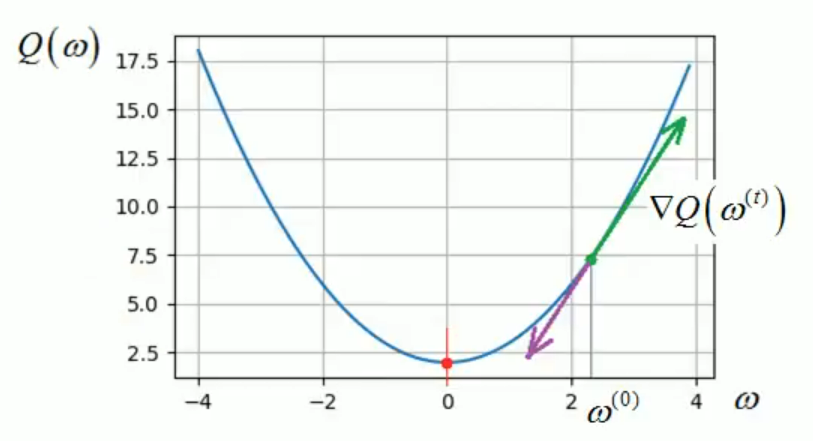

## SGD - Стахостический градиентный спуск

Градиентный спуск для некоторый выборки объектов

[ 0.0837608  -0.04161137  0.00118534]
[1.0, 1.0, 1.006779172308028, 1.0090509372165286, 1.0042042894366148, 1.011855806816933, 1.0162234613570158, 1.0191472662864094, 1.0209268327854295, 1.014932409321875, 1.0064096043037787, 0.9983500818813473, 0.9897666009573306, 0.9972559197048446, 1.0050836984314426, 0.9956560365439462, 1.0018059038856693, 0.9945854974645133, 1.001597683508558, 1.0063584713492852, 0.997921874771785, 0.9900794952697904, 0.9955861945959208, 0.9958771712405459, 0.990063051958653, 0.9916165509641676, 0.9926662181922339, 0.9908187393892157, 0.9867163685842495, 0.9844993169213291, 0.9801880473856537, 0.9784905336465861, 0.976233075782891, 0.9730064252232276, 0.966324497280156, 0.9633962124249822, 0.9603218314903226, 0.9614830622548755, 0.9539654319081909, 0.9511978995873321, 0.9433004338285236, 0.9408258669545448, 0.9383061918220098, 0.9380974225732089, 0.9346928122062171, 0.9363645070827946, 0.9324487303479067, 0.9290234466157624, 0.9271276307511683, 0.9256253070188626,

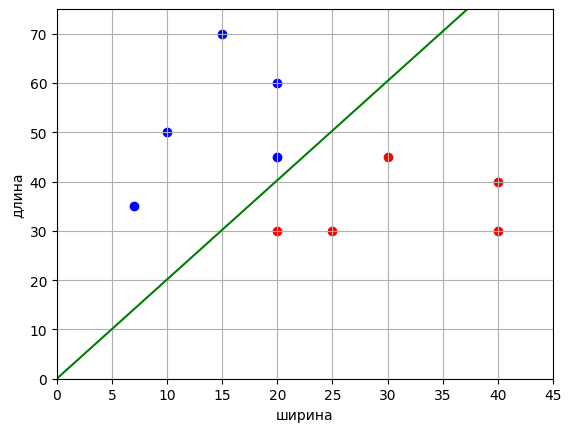

In [132]:
np.random.seed(42)
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))


# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.001  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    # nt = nt * (1 - i/N)
    nt = nt * np.exp(- i/N)
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
print(Q_plot)

line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

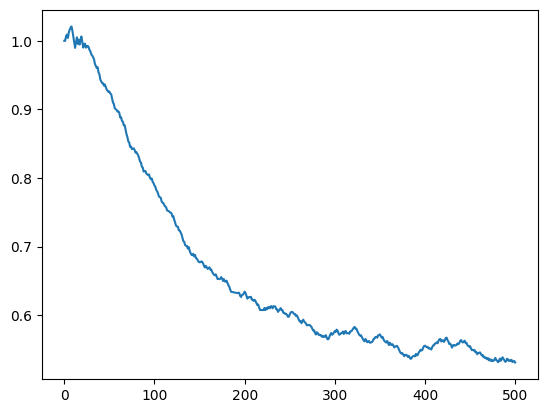

In [133]:
plt.plot(Q_plot)

## SAG - Стахостический средний градиентный спуск

#Оптимизаторы

# Регуляризация

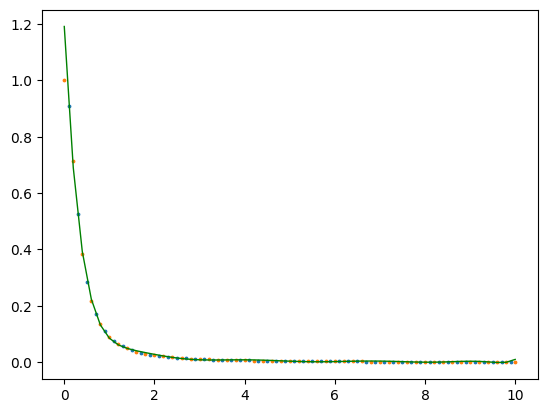

In [9]:
def predict_poly(x, koeff):
    res = 0
    for i, k in enumerate(koeff):
        res += k * x ** (len(koeff) - i - 1)
    return res

x = np.arange(0, 10.1, 0.1)
y = 1 / (1 + 10 * np.square(x))

x_train, y_train = x[1::2], y[1::2]
x_test, y_test = x[::2], y[::2]

N = len(x)

z_train = np.polyfit(x_train, y_train, 10)

plt.scatter(x_train, y_train, s = 3)
plt.scatter(x_test, y_test, s = 3)
plt.plot(x_test, predict_poly(x_test, z_train), 'g', linewidth=1)

## $L_1$-регуляризация

[-2.18540352e-07 -4.88148755e-06  5.14178146e-02 -1.28688149e-02
 -5.50013949e-06 -1.28688149e-02]
0.06467222099589275


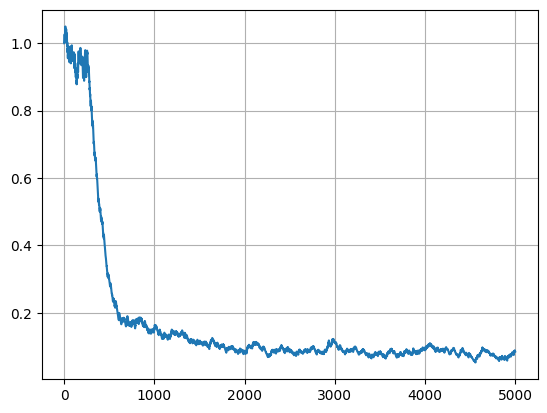

In [70]:
np.random.seed(42)
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    L1 = 2
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 *  np.sign(w)

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1]), 10*x[1]] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффициенты
nt = 0.00001             # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q
N = 5000                 # число итераций SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 -
                   lm) * Q                  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()

## $L_2$-регуляризация

[ 4.97803425e+02 -5.96312836e-01 -1.00348056e+00 -1.27496285e+00
 -1.09040632e+00 -1.84750490e-01  6.58413827e-01 -3.03586207e-01
  6.87833680e-02 -8.98349460e-03  6.89989000e-04 -2.90537400e-05
  5.18879759e-07]


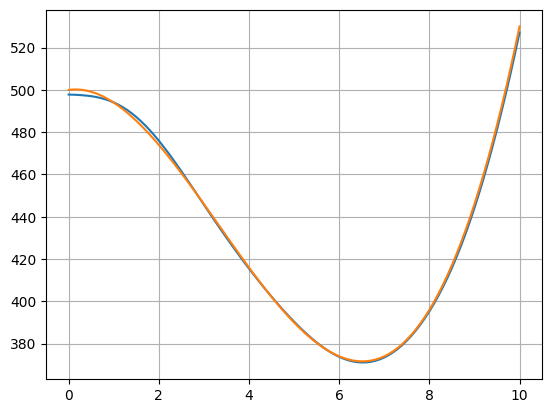

In [28]:
# Пример работы L2-регуляризатора
x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 20  # при увеличении N увеличивается L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка
Y = y_train  # обучающая выборка

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = Y @ X_train @ A
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()

# Баейсовский классификатор

In [14]:
def getL(y1, m1_F, m1_M, d1):
    res = 1/(2*d1)*((y1-m1_F)**2 - (y1-m1_M)**2)
    return res

def getL0(p0, p1):
    return np.log(p0/p1)

m1_F = 60   # средний вес женщин (кг)
m1_M = 85   # средний вес мужчин (кг)

d1 = 9     # дисперсия разброса веса (кг^2)

p0 = 0.48   # вероятность для женщин
p1 = 0.52   # вероятность для мужчин

N = 100     # число экспериментов

L0 = getL0(p0, p1)

nM = 0
for i in range(N):
    y1 = np.random.normal(m1_F, d1)

    L = getL(y1, m1_F, m1_M, d1)

    if(L >= L0):
        print("Мужчина", y1)
        nM += 1
    else:
        print("Женщина", y1)

error = nM/N*100
print(f"Ошибка: {np.round(error, 2)}%")

Женщина 63.22008624313455
Женщина 65.04706073731411
Женщина 69.74746118857749
Женщина 69.48421846831413
Женщина 47.60097568838618
Женщина 51.5595746407639
Женщина 64.63531740487794
Женщина 64.62407355820989
Женщина 64.63542917675443
Мужчина 94.6745834158925
Женщина 65.1380145962385
Женщина 70.22009076162539
Женщина 68.58601587143882
Женщина 65.86252126175218
Женщина 57.16257679823689
Женщина 66.8307229844394
Женщина 53.044573069161856
Женщина 57.86863253933992
Женщина 55.63172806953807
Женщина 60.736867254476905
Мужчина 80.83192710006158
Женщина 43.19461326667427
Женщина 66.17634171337062
Женщина 45.48555715929314
Женщина 55.752613207895095
Женщина 69.8005553727063
Женщина 60.57852017185917
Женщина 50.30029699863624
Женщина 53.56226661666029
Женщина 66.11637974041209
Женщина 53.42670031454577
Женщина 61.94812730623777
Женщина 60.410146559134326
Женщина 54.13559687154765
Мужчина 79.29549680392793
Женщина 65.7052712008621
Женщина 41.77371672008154
Женщина 61.67808883292485
Женщина 54.043

## Наивный Баейсовский классификатор

Вероятность принадлежать классу 0:  0.762214783132307
Вероятность принадлежать классу 1:  0.23778521686769313
Номер класса (0 - гусеница, 1 - божья коровка): 0


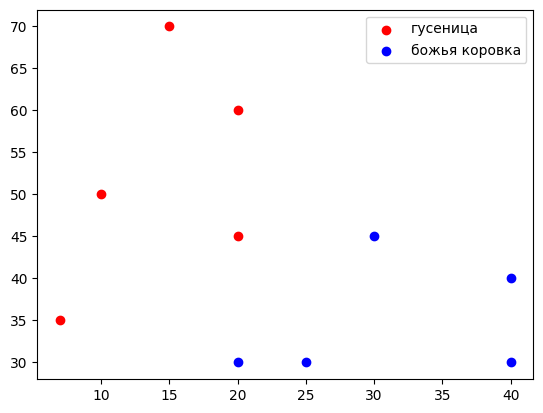

In [17]:
#для логистической регрессии
# Данные
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Вычисление средних и дисперсий с учетом смещения
mean_class1 = np.mean(x_train[y_train == 1], axis=0)
mean_class2 = np.mean(x_train[y_train == -1], axis=0)
var_class1 = np.var(x_train[y_train == 1], axis=0, ddof=1)
var_class2 = np.var(x_train[y_train == -1], axis=0, ddof=1)

# Функция для вычисления апостериорной вероятности
def posterior_prob(x, mean, var):
    return np.exp(-np.sum((x - mean)**2 / (2 * var)))

# Новый объект для классификации
x_new = np.array([20, 45])

# Вычисление апостериорных вероятностей
posterior_1 = posterior_prob(x_new, mean_class1, var_class1)
posterior_2 = posterior_prob(x_new, mean_class2, var_class2)

# Нормализация вероятностей
total_prob = posterior_1 + posterior_2
posterior_1 /= total_prob
posterior_2 /= total_prob

# Классификация
print('Вероятность принадлежать классу 0: ', posterior_2)
print('Вероятность принадлежать классу 1: ', posterior_1)
predicted_class = np.argmax([posterior_2, posterior_1])  # Индексы классов начинаются с 0

print('Номер класса (0 - гусеница, 1 - божья коровка):', predicted_class)


x_0 = x_train[y_train == -1]                 # гусеница
x_1 = x_train[y_train == 1]                  # божья коровка
plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label = 'гусеница')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label = 'божья коровка')
plt.legend()

## Гауссовский Байесовский классификатор

1


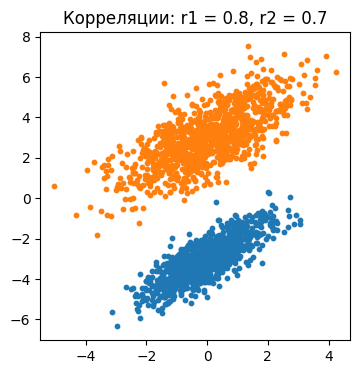

In [20]:
np.random.seed(1)

# исходные параметры распределений двух классов
r1 = 0.8
D1 = 1.0
mean1 = [0, -3]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [0, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, 0])  # входной вектор в формате (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
print(a)

# вывод графиков
plt.figure(figsize=(4, 4))
plt.title(f"Корреляции: r1 = {r1}, r2 = {r2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()

#Метод опорных векторов(SVM)

Линейно-разделимая выборка

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[ 0.24371906 -0.13071297  0.01218595]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


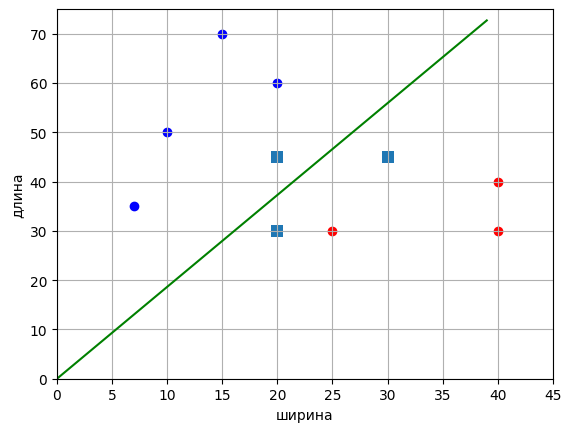

In [27]:
from sklearn import svm

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = svm.SVC(kernel='linear')      # SVM с линейным ядром
clf.fit(x_train, y_train)           # нахождение вектора w по обучающей выборке

lin_clf = svm.LinearSVC()           # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train)       # нахождение вектора w по обучающей выборке

v = clf.support_vectors_            # выделение опорных векторов
w = lin_clf.coef_[0]                # коэффициенты линейной модели
print(w, v, sep='\n')


# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

Гипотеза?

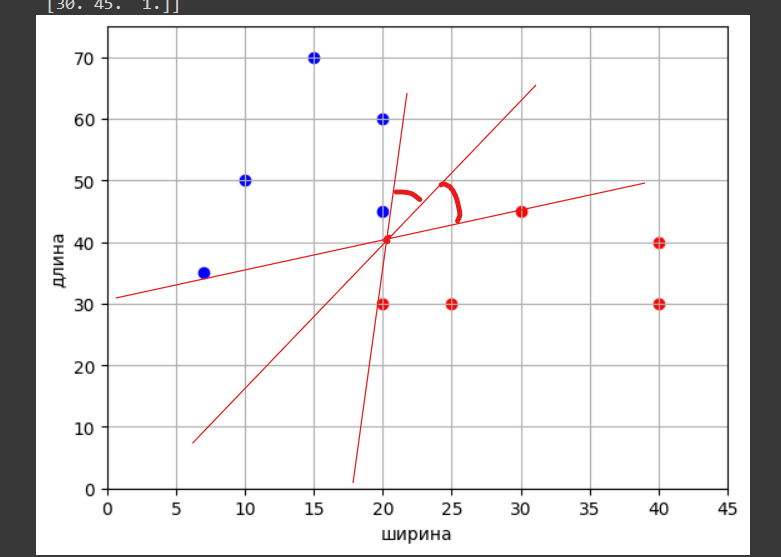

Линейно-неразделимая выборка

[-2  2  0  0  0  0  0  0  0  0  0  0]
[[30. 10.  1.]
 [20. 60.  1.]
 [20. 45.  1.]
 [ 7. 35.  1.]
 [15. 50.  1.]
 [20. 30.  1.]
 [25. 30.  1.]
 [30. 45.  1.]]


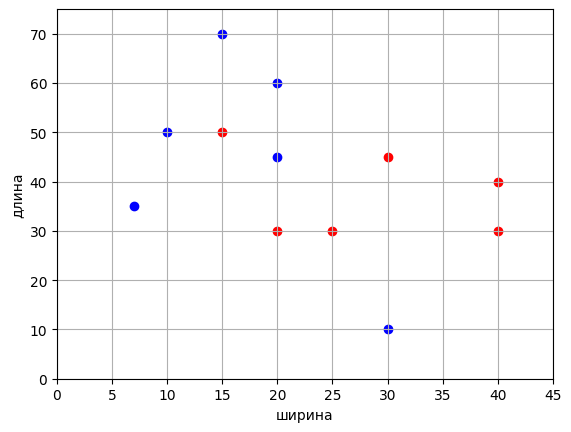

In [23]:
from sklearn import svm

# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[30, 10], [15, 50], [10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = svm.SVC(kernel='linear')  # SVM с линейным ядром
clf.fit(x_train, y_train)  # нахождение вектора w по обучающей выборке
y_pr = clf.predict(x_train)  # проверка на обучающей выборке
print(np.array(y_train) - np.array(y_pr))  # нули - без ошибок; иначе - ошибка

v = clf.support_vectors_  # выделение опорных векторов
print(v)

# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
# plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

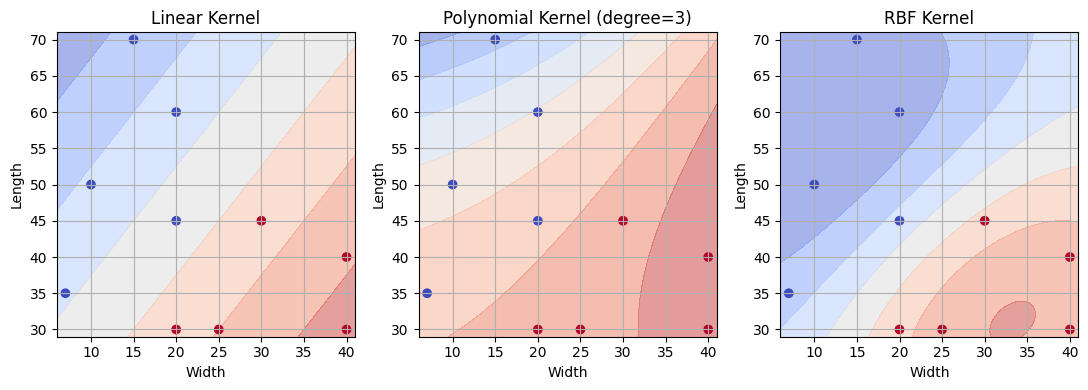

In [57]:
def plot_svc_decision_boundary(svc, X, y, title):
    """Plot the decision boundary for a support vector classifier (SVC) on a dataset.

    Parameters:
        svc: A trained SVC object.
        X: A 2D numpy array containing the training data.
        y: A 1D numpy array containing the labels for the training data.
        title: The title of the plot.

    Returns:
        None
    """

    # Create a mesh to plot the in-between colors
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


    # Predict values of each data point in the mesh
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and scatter plot

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.xlabel("Width")
    plt.ylabel("Length")
    plt.grid(True)


# Sample data
X = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Create SVC objects with different kernels
svc_linear = svm.SVC(kernel='linear')
svc_poly = svm.SVC(kernel='poly', degree=3)
svc_rbf = svm.SVC(kernel='rbf')

# Train the SVC models
svc_linear.fit(X, y)
svc_poly.fit(X, y)
svc_rbf.fit(X, y)

# Create plots for each SVC model
plt.figure(figsize=(11, 4))
plt.subplot(131)
plot_svc_decision_boundary(svc_linear, X, y, "Linear Kernel")
plt.subplot(132)
plot_svc_decision_boundary(svc_poly, X, y, "Polynomial Kernel (degree=3)")
plt.subplot(133)
plot_svc_decision_boundary(svc_rbf, X, y, "RBF Kernel")

plt.tight_layout()
plt.show()

#Метод опорных векторов (PCA)

In [1]:
# вычисление собственных векторов и собственных чисел

import numpy as np
import matplotlib.pyplot as plt

SIZE = 1000
np.random.seed(123)
x = np.random.normal(size=SIZE)
y = np.random.normal(size=SIZE)
z = (x + y) / 2

F = np.vstack([x, y, z])
FF = 1 / SIZE * F @ F.T
L, W = np.linalg.eig(FF)
WW = sorted(zip(L, W.T), key=lambda lx: lx[0], reverse=True)
WW = np.array([w[1] for w in WW])

print(sorted(L, reverse=True))

[1.4018930165258376, 0.9841864212968798, 0.0]


#Аппроксимация данных ядерным сглаживанием

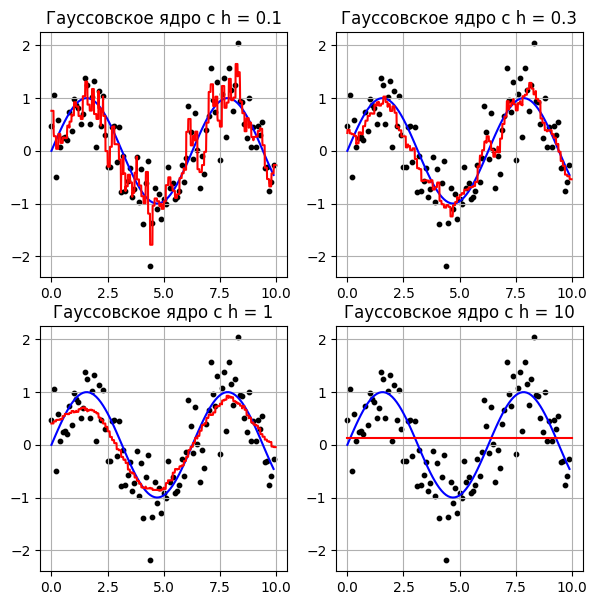

In [4]:
x = np.arange(0, 10, 0.1)           # отсчеты для исходного сигнала
x_est = np.arange(0, 10, 0.01)      # отсчеты, где производится восстановление функции
N = len(x)
y_sin = np.sin(x)
y = y_sin + np.random.normal(0, 0.5, N)

# аппроксимация ядерным сглаживанием
h = 0.9     # при окне меньше 0.1 для финитных ядер будут ошибки

# K = lambda r: np.exp(-2 * r * r)        # гауссовское ядро
K = lambda r: np.abs(1 - r) * bool(r <= 1)        # треугольное ядро
# K = lambda r: bool(r <= 1)        # прямоугольное ядро

ro = lambda xx, xi: np.abs(xx - xi)     # метрика
w = lambda xx, xi: K(ro(xx, xi) / h)    # веса

plt.figure(figsize=(7, 7))
plot_number = 0

for h in [0.1, 0.3, 1, 10]:
    y_est = []
    for xx in x_est:
        ww = np.array([w(xx, xi) for xi in x])
        yy = np.dot(ww, y) / sum(ww)            # формула Надарая-Ватсона
        y_est.append(yy)

    plot_number += 1
    plt.subplot(2, 2, plot_number)

    plt.scatter(x, y, color='black', s=10)
    plt.plot(x, y_sin, color='blue')
    plt.plot(x_est, y_est, color='red')
    plt.title(f"Гауссовское ядро с h = {h}")
    plt.grid()

plt.show()